In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

bottle = pd.read_csv('bottle.csv', low_memory=False)
bottle.shape

(864863, 74)

### deleting all the same columns as we do in spark

In [2]:
bottle = bottle.drop(["Sta_ID","Depth_ID","IncTim","DIC Quality Comment","Cst_Cnt","Btl_Cnt","BtlNum"], axis=1)
bottle = bottle.drop(['T_qual','S_qual','P_qual','O_qual','O2Satq','Chlqua','Phaeop','Phaqua','PO4uM','PO4q','SiO3qu','NO2q','NO3q','NH3q','C14A1q','C14A2q','DarkAq','MeanAq'], axis=1)

manually deleting the <200k NaN columns:

In [3]:
bottle = bottle.drop(['SThtaq','NH3uM','C14As1','C14A1p','C14As2','C14A2p','DarkAs','DarkAp','MeanAs','MeanAp','LightP','R_NH4','DIC1','DIC2','TA1','TA2','pH2','pH1','R_SAMP'], axis=1)

In [4]:
bottle.shape

(864863, 30)

In [5]:
bottle = bottle.drop("ChlorA", axis=1)
bottle = bottle.dropna(subset="R_CHLA")
bottle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225276 entries, 472997 to 864862
Data columns (total 29 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Depthm       225276 non-null  int64  
 1   T_degC       222188 non-null  float64
 2   Salnty       221843 non-null  float64
 3   O2ml_L       221666 non-null  float64
 4   STheta       221495 non-null  float64
 5   O2Sat        220776 non-null  float64
 6   Oxy_µmol/Kg  220774 non-null  float64
 7   RecInd       225276 non-null  int64  
 8   T_prec       222188 non-null  float64
 9   S_prec       221843 non-null  float64
 10  SiO3uM       216329 non-null  float64
 11  NO2uM        210325 non-null  float64
 12  NO3uM        215703 non-null  float64
 13  R_Depth      225276 non-null  float64
 14  R_TEMP       222188 non-null  float64
 15  R_POTEMP     221768 non-null  float64
 16  R_SALINITY   221843 non-null  float64
 17  R_SIGMA      221621 non-null  float64
 18  R_SVA        221646

### finding "duplicate" columns

Chlorophyll
* 'ChlorA': Acetone extracted chlorophyll-a measured fluorometrically
* 'R_CHLA': Reported Chlorophyll-a

Depth
* 'Depthm': Depth in meters
* 'R_Depth': Reported Depth (from pressure) in meters

Water density
* 'STheta': Potential Density of Water
* 'R_SIGMA': Reported Potential Density of water

Silicate
* 'SiO3uM': Micromoles Silicate per liter of seawater
* 'R_SIO3': Reported Silicate Concentration

Nitrite
* 'NO2uM': Micromoles Nitrite per liter of seawater
* 'R_NO2': Reported Nitrite Concentration

Nitrate
* 'NO3uM': Micromoles Nitrate per liter of seawater
* 'R_NO3': Reported Nitrate Concentration

Salinity
* 'Salnty': Practical Salinity Scale, 1978 (UNESCO, 1981a); Salinity of water
* 'R_SALINITY': Reported Salinity (from Specific Volume Anomoly, M³/Kg)

O2 saturation
* 'O2Sat': Percent Saturation; Oxygen Saturation
* 'R_O2Sat': Percent	Reported Oxygen Saturation

Oxygen
* 'O2ml_L': Oxygen in mL/L; Milliliters of dissolved oxygen per Liter seawater
* 'Oxy_µmol/Kg': Oxygen in micro moles per kilogram of seawater
* 'R_O2': Reported milliliters of oxygen per liter of seawater

Temperature
* 'T_degC': Temperature of Water
* 'R_TEMP': Reported Temperature (Celsius)
* 'R_POTEMP': Reported Potential Temperature (Celsius)

Etc.
* 'S_prec': Salinity Units of Precision
* 'T_prec': Temperature Units of Precision
* 'RecInd': Record Indicator
* 'R_SVA': Reported Specific Volume Anomaly
* 'R_DYNHT': Reported Dynamic Height
* 'R_PO4': Reported Phosphate Concentration
* 'R_PHAEO': Reported Phaeophytin
* 'R_PRES': Pressure in decibars

#### 2 matches

In [6]:
def psudoDuplicateCheck(attributes):
    # print(bottle[attributes].info())
    print(bottle[attributes].count())
    sns.pairplot(bottle[attributes])
    plt.show()
    return bottle[attributes].corr()    

Depths:
Depthm     225276
R_Depth    225276
dtype: int64


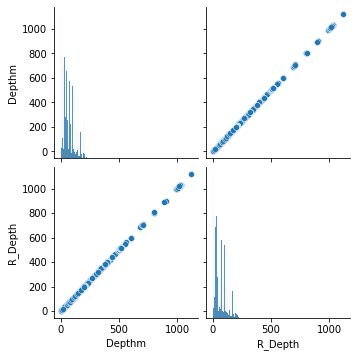

,Depthm,R_Depth
Depthm,1.0,1.0
R_Depth,1.0,1.0


In [8]:
Depths = ["Depthm","R_Depth"]
print("Depths:")
psudoDuplicateCheck(Depths)

Water density:
STheta     221495
R_SIGMA    221621
dtype: int64


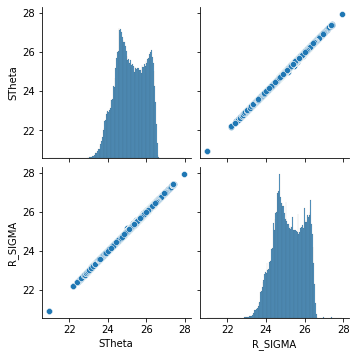

,STheta,R_SIGMA
STheta,1.000000,0.999991
R_SIGMA,0.999991,1.000000


In [9]:
WD = ["STheta","R_SIGMA"]
print("Water density:")
psudoDuplicateCheck(WD)

Silicate:
SiO3uM    216329
R_SIO3    216335
dtype: int64


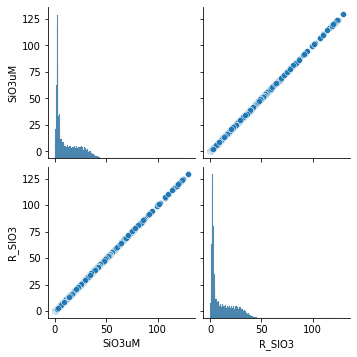

,SiO3uM,R_SIO3
SiO3uM,1.0,1.0
R_SIO3,1.0,1.0


In [10]:
Silicate = ["SiO3uM","R_SIO3"]
print("Silicate:")
psudoDuplicateCheck(Silicate)

Nitrite:
NO2uM    210325
R_NO2    210331
dtype: int64


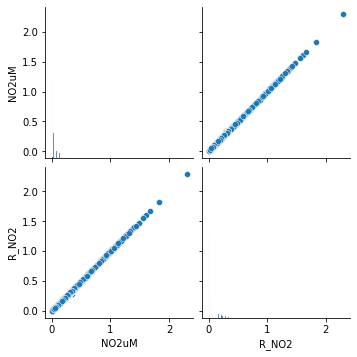

,NO2uM,R_NO2
NO2uM,1.000000,0.999975
R_NO2,0.999975,1.000000


In [11]:
Nitrite = ["NO2uM","R_NO2"]
print("Nitrite:")
psudoDuplicateCheck(Nitrite)

Nitrate:
NO3uM    215703
R_NO3    215709
dtype: int64


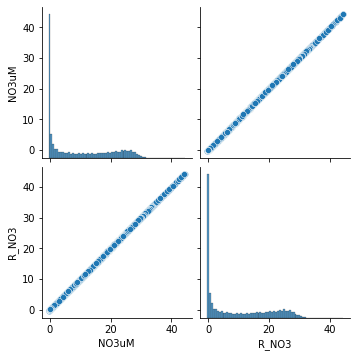

,NO3uM,R_NO3
NO3uM,1.0,1.0
R_NO3,1.0,1.0


In [12]:
Nitrate = ["NO3uM","R_NO3"]
print("Nitrate:")
psudoDuplicateCheck(Nitrate)

Salinity:
Salnty        221843
R_SALINITY    221843
dtype: int64


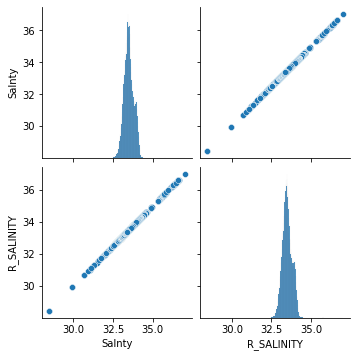

,Salnty,R_SALINITY
Salnty,1.000000,0.999998
R_SALINITY,0.999998,1.000000


In [13]:
Salinity = ["Salnty","R_SALINITY"]
print("Salinity:")
psudoDuplicateCheck(Salinity)

O2 Saturation:
O2Sat      220776
R_O2Sat    220924
dtype: int64


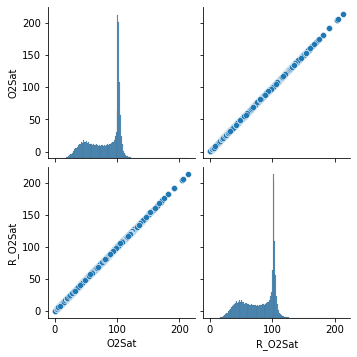

,O2Sat,R_O2Sat
O2Sat,1.0,1.0
R_O2Sat,1.0,1.0


In [14]:
Saturation = ["O2Sat","R_O2Sat"]
print("O2 Saturation:")
psudoDuplicateCheck(Saturation)

#### 3+ matches

Oxygen:
O2ml_L         221666
Oxy_µmol/Kg    220774
R_O2           221666
dtype: int64


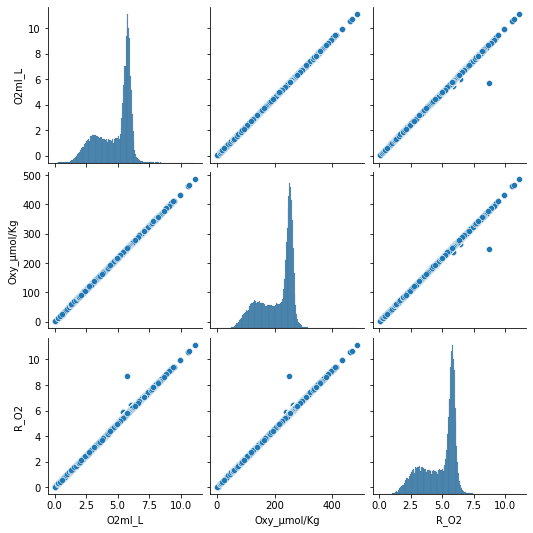

,O2ml_L,Oxy_µmol/Kg,R_O2
O2ml_L,1.000000,0.999997,0.999987
Oxy_µmol/Kg,0.999997,1.000000,0.999985
R_O2,0.999987,0.999985,1.000000


In [15]:
Oxygen = ["O2ml_L","Oxy_µmol/Kg","R_O2"]
print("Oxygen:")
psudoDuplicateCheck(Oxygen)

Temperature:
T_degC      222188
R_TEMP      222188
R_POTEMP    221768
dtype: int64


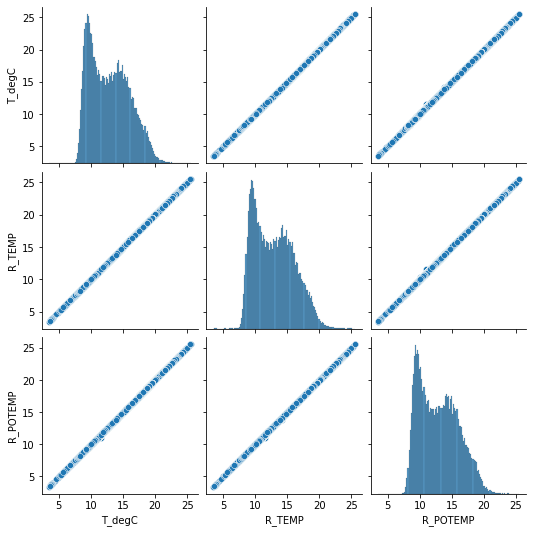

,T_degC,R_TEMP,R_POTEMP
T_degC,1.000000,1.000000,0.999998
R_TEMP,1.000000,1.000000,0.999998
R_POTEMP,0.999998,0.999998,1.000000


In [16]:
Temperature = ["T_degC","R_TEMP","R_POTEMP"]
print("Temperature:")
psudoDuplicateCheck(Temperature)

Etc:
S_prec     221843
T_prec     222188
RecInd     225276
R_SVA      221646
R_DYNHT    221749
R_PO4      214954
R_PHAEO    225271
R_PRES     225276
dtype: int64


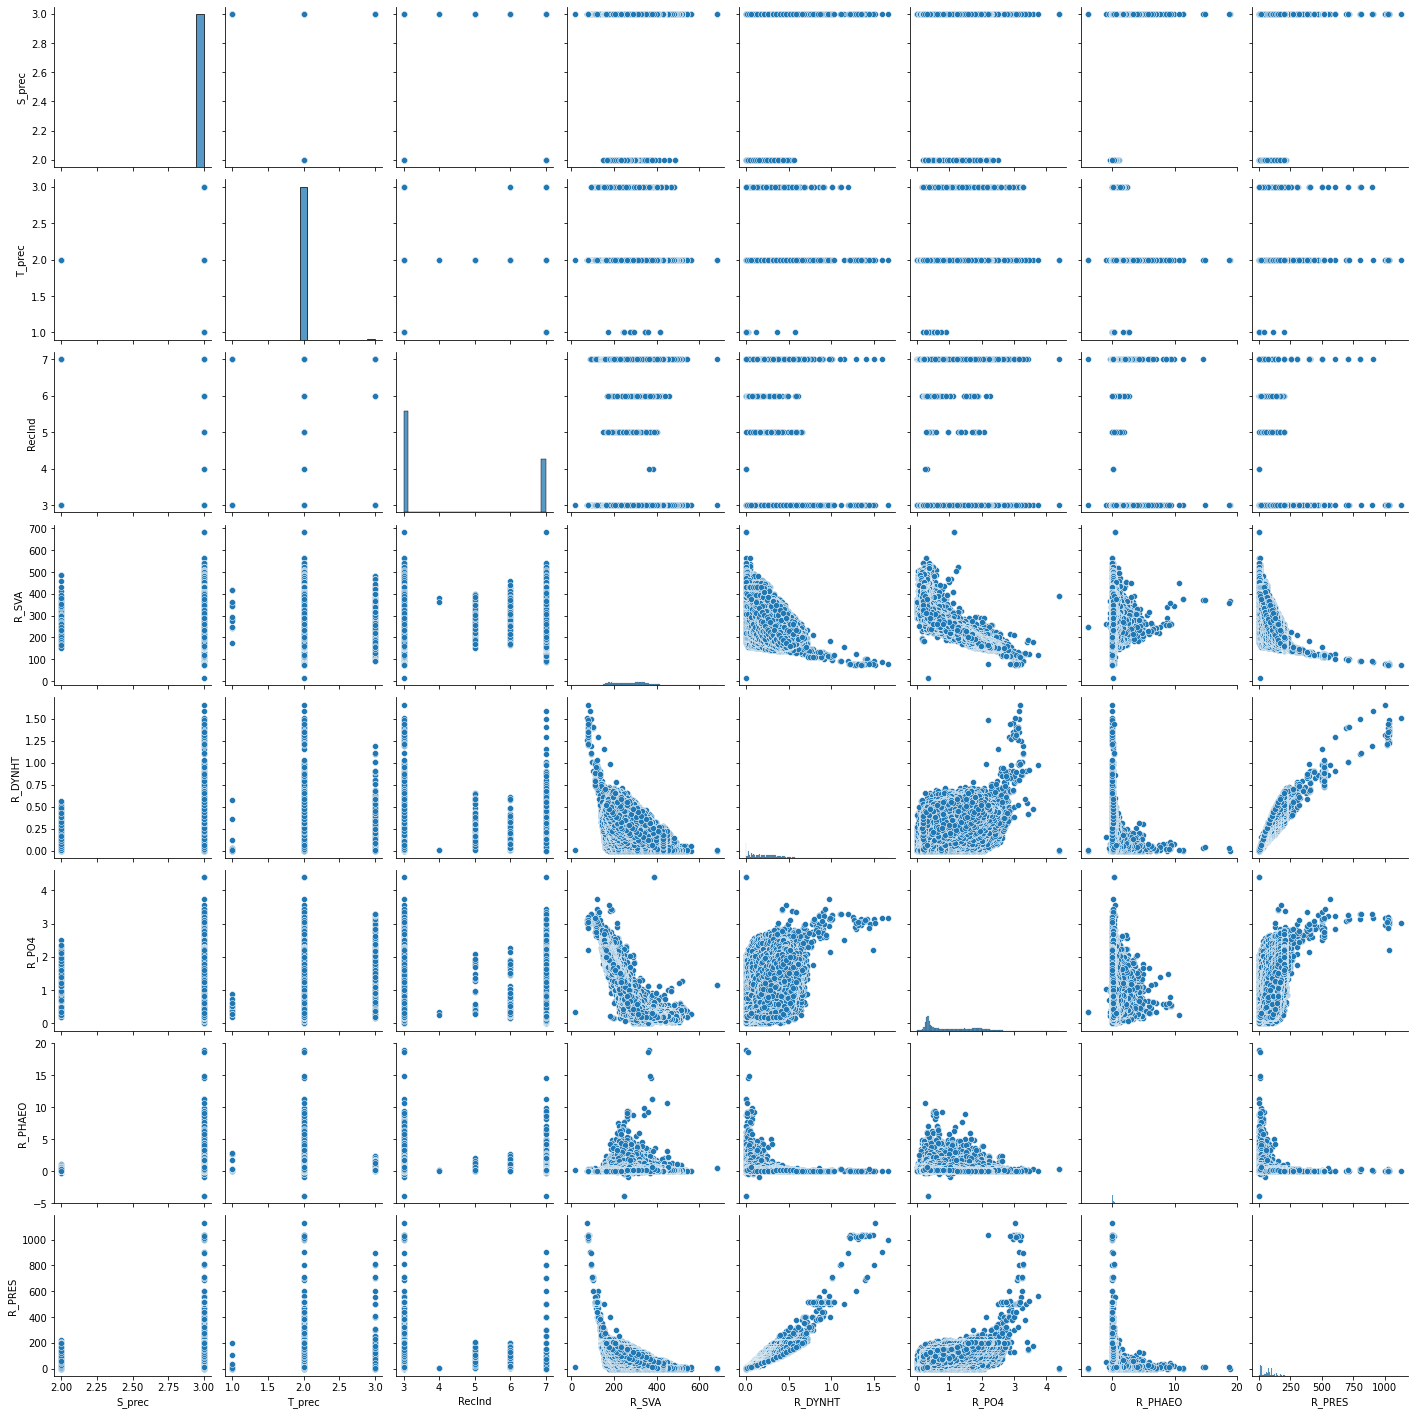

,S_prec,T_prec,RecInd,R_SVA,R_DYNHT,R_PO4,R_PHAEO,R_PRES
S_prec,1.000000,0.001460,0.015365,0.003494,0.002540,-0.003532,-0.000700,0.000546
T_prec,0.001460,1.000000,0.018878,-0.021101,0.001421,0.024991,0.010931,0.014385
RecInd,0.015365,0.018878,1.000000,0.050790,-0.058898,-0.037840,-0.052885,-0.051830
R_SVA,0.003494,-0.021101,0.050790,1.000000,-0.678692,-0.921336,-0.013480,-0.772909
R_DYNHT,0.002540,0.001421,-0.058898,-0.678692,1.000000,0.647246,-0.245732,0.959576
R_PO4,-0.003532,0.024991,-0.037840,-0.921336,0.647246,1.000000,-0.084771,0.772630
R_PHAEO,-0.000700,0.010931,-0.052885,-0.013480,-0.245732,-0.084771,1.000000,-0.224516
R_PRES,0.000546,0.014385,-0.051830,-0.772909,0.959576,0.772630,-0.224516,1.000000


In [17]:
Etc = ["S_prec","T_prec","RecInd","R_SVA","R_DYNHT","R_PO4","R_PHAEO","R_PRES"]
print("Etc:")
psudoDuplicateCheck(Etc)

#### found 'em

deleting the columns with fewer NaNs if they have a correlation coeffecients of 0.9999 or higher.

In [18]:
# needs more investigation: "S_prec", "T_prec", and "RecInd"
bottle = bottle.drop(["Depthm","STheta","SiO3uM","NO2uM","NO3uM","Salnty","T_degC","R_POTEMP","O2ml_L","Oxy_µmol/Kg","O2Sat"], axis=1)

In [19]:
bottle.shape

(225276, 18)